# Project : CabEdge

## This are different Modelling Techniques used for this project

In [103]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [104]:
warnings.simplefilter('always')

In [105]:
from fbprophet import Prophet

In [106]:
from fbprophet.diagnostics import cross_validation

In [112]:
df = pd.read_csv('/home/jupyter/capstone/database/complete_pickup_2018.csv')

In [113]:
# plt.figure(figsize=(12,12))
# sns.scatterplot(x='datetime',y='Count',data=df[df['PULocationID'] == 103])

In [114]:
df.head()

,Unnamed: 0,datetime,apparentTemperature,summary,windSpeed,PULocationID,pickup_year,pickup_month,pickup_day,pickup_hour,Count
0,0,2018-04-01 00:00:00,40.42,Clear,3.27,1.0,2018,4,1,0,0.0
1,1,2018-04-01 01:00:00,45.16,Clear,2.28,1.0,2018,4,1,1,0.0
2,2,2018-04-01 02:00:00,48.38,Clear,1.34,1.0,2018,4,1,2,0.0
3,3,2018-04-01 02:00:00,51.37,Clear,1.68,1.0,2018,4,1,2,0.0
4,4,2018-04-01 03:00:00,53.91,Clear,2.96,1.0,2018,4,1,3,0.0


In [115]:
df.drop(columns=['Unnamed: 0','summary'],inplace=True)

In [116]:
df.head()

,datetime,apparentTemperature,windSpeed,PULocationID,pickup_year,pickup_month,pickup_day,pickup_hour,Count
0,2018-04-01 00:00:00,40.42,3.27,1.0,2018,4,1,0,0.0
1,2018-04-01 01:00:00,45.16,2.28,1.0,2018,4,1,1,0.0
2,2018-04-01 02:00:00,48.38,1.34,1.0,2018,4,1,2,0.0
3,2018-04-01 02:00:00,51.37,1.68,1.0,2018,4,1,2,0.0
4,2018-04-01 03:00:00,53.91,2.96,1.0,2018,4,1,3,0.0


In [117]:
df.tail()

,datetime,apparentTemperature,windSpeed,PULocationID,pickup_year,pickup_month,pickup_day,pickup_hour,Count
2303875,2018-09-30 19:00:00,54.16,4.43,263.0,2018,9,30,19,279.0
2303876,2018-09-30 20:00:00,53.53,5.02,263.0,2018,9,30,20,208.0
2303877,2018-09-30 21:00:00,52.96,4.77,263.0,2018,9,30,21,171.0
2303878,2018-09-30 22:00:00,55.63,5.04,263.0,2018,9,30,22,135.0
2303879,2018-09-30 23:00:00,57.95,5.36,263.0,2018,9,30,23,65.0


In [32]:
print(np.corrcoef(x=df['windSpeed'],y=df['Count']))

[[ 1.         -0.04458843]
 [-0.04458843  1.        ]]


In [33]:
print(np.corrcoef(x=df['apparentTemperature'],y=df['Count']))

[[ 1.        -0.0257121]
 [-0.0257121  1.       ]]


In [34]:
df.rename(columns={'datetime':'ds','Count' : 'y'},inplace=True)

In [35]:
df.head()

,Unnamed: 0,ds,apparentTemperature,summary,windSpeed,PULocationID,pickup_year,pickup_month,pickup_day,pickup_hour,y
0,0,2018-04-01 00:00:00,40.42,Clear,3.27,1.0,2018,4,1,0,0.0
1,1,2018-04-01 01:00:00,45.16,Clear,2.28,1.0,2018,4,1,1,0.0
2,2,2018-04-01 02:00:00,48.38,Clear,1.34,1.0,2018,4,1,2,0.0
3,3,2018-04-01 02:00:00,51.37,Clear,1.68,1.0,2018,4,1,2,0.0
4,4,2018-04-01 03:00:00,53.91,Clear,2.96,1.0,2018,4,1,3,0.0


In [36]:
specific_location = df[df['PULocationID'] == 103]

In [37]:
specific_location = specific_location[['ds','apparentTemperature','windSpeed','y']]

In [38]:
specific_location['ds'] = pd.to_datetime(specific_location['ds'])

In [39]:
specific_location=specific_location.sort_values(by='ds')

In [40]:
specific_location.head()

,ds,apparentTemperature,windSpeed,y
833591,2018-01-01 00:00:00,1.54,7.83,0.0
833592,2018-01-01 01:00:00,3.08,6.69,0.0
833593,2018-01-01 02:00:00,1.97,8.10,0.0
833594,2018-01-01 03:00:00,3.26,7.96,0.0
833595,2018-01-01 04:00:00,6.69,5.10,0.0


In [41]:
specific_location.dtypes

ds                     datetime64[ns]
apparentTemperature           float64
windSpeed                     float64
y                             float64
dtype: object

In [42]:
specific_location.tail()

,ds,apparentTemperature,windSpeed,y
461922,2018-12-31 19:00:00,31.17,1.53,0.0
461923,2018-12-31 20:00:00,31.69,1.54,0.0
461924,2018-12-31 21:00:00,31.59,1.54,0.0
461925,2018-12-31 22:00:00,31.23,1.40,0.0
461926,2018-12-31 23:00:00,32.56,1.65,0.0


In [47]:
specific_location['cap']= specific_location['y'].max()
specific_location['floor'] = 0

In [48]:
specific_location.columns

Index(['ds', 'apparentTemperature', 'windSpeed', 'y', 'cap', 'floor'], dtype='object')

In [49]:
future = specific_location[['ds', 'apparentTemperature', 'windSpeed','cap','floor']]

In [50]:
future.head()

,ds,apparentTemperature,windSpeed,cap,floor
833591,2018-01-01 00:00:00,1.54,7.83,0.0,0
833592,2018-01-01 01:00:00,3.08,6.69,0.0,0
833593,2018-01-01 02:00:00,1.97,8.10,0.0,0
833594,2018-01-01 03:00:00,3.26,7.96,0.0,0
833595,2018-01-01 04:00:00,6.69,5.10,0.0,0


In [51]:
future.dtypes

ds                     datetime64[ns]
apparentTemperature           float64
windSpeed                     float64
cap                           float64
floor                           int64
dtype: object

In [52]:
print(specific_location['y'].max())

0.0


In [53]:
specific_location['y'].describe()

count    8760.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: y, dtype: float64

In [54]:
future['cap'] = 1392
future['floor'] = 0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
drop_df = pd.read_csv('/home/jupyter/capstone/database/complete_dropoff_2018.csv')

In [56]:
drop_df.rename(columns={'datetime':'ds','Count' : 'y'},inplace=True)

In [57]:
specific_drop = drop_df[drop_df['DOLocationID'] == 104]

In [58]:
specific_drop = specific_drop[['ds','apparentTemperature','windSpeed','y']]

In [59]:
specific_drop['cap']= specific_drop['y'].max() + 1
specific_drop['floor'] = 0

In [60]:
specific_drop['ds'] = pd.to_datetime(specific_drop['ds'])

In [62]:
m = Prophet(growth='logistic',changepoint_prior_scale = 30,seasonality_prior_scale=35,holidays_prior_scale=20,seasonality_mode='multiplicative',yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True)
m.add_country_holidays(country_name='US')
m.add_seasonality(name='hourly', period=24, fourier_order=5)

In [63]:
m.train_holiday_names

In [ ]:
# m.add_regressor('type')
# m.add_regressor('Total Volume')
# m.add_regressor('4046')
# m.add_regressor('4225')
# m.add_regressor('4770')
# m.add_regressor('Small Bags')

In [64]:
m.add_regressor('apparentTemperature')
m.add_regressor('windSpeed')

In [65]:
m.fit(specific_drop)

In [ ]:
# jan_2019 = pd.read_csv('C:/Users/Arinab/Desktop/DataScience/capstone/Processed-dataframe/weather_pickup_jan_2019.csv')

In [66]:
specific_drop['cap'].unique()

array([2.])

In [86]:
forecast = m.predict(future)

In [87]:
forecast

,ds,trend,cap,floor,trend_lower,trend_upper,yhat_lower,yhat_upper,Christmas Day,Christmas Day_lower,...,weekly,weekly_lower,weekly_upper,windSpeed,windSpeed_lower,windSpeed_upper,yearly,yearly_lower,yearly_upper,yhat
0,2018-01-01 00:00:00,7.604817e-23,1392,0,7.604817e-23,7.604817e-23,-0.012781,0.012292,0.0,0.0,...,-11.903279,-11.903279,-11.903279,36.934053,36.934053,36.934053,-7.148552,-7.148552,-7.148552,6.009428e-21
1,2018-01-01 01:00:00,7.610514e-23,1392,0,7.610514e-23,7.610514e-23,-0.013047,0.012773,0.0,0.0,...,-14.697650,-14.697650,-14.697650,22.643332,22.643332,22.643332,-7.143359,-7.143359,-7.143359,4.187826e-21
2,2018-01-01 02:00:00,7.616216e-23,1392,0,7.616216e-23,7.616216e-23,-0.013180,0.012407,0.0,0.0,...,-17.190069,-17.190069,-17.190069,40.318698,40.318698,40.318698,-7.138130,-7.138130,-7.138130,3.531828e-21
3,2018-01-01 03:00:00,7.621922e-23,1392,0,7.621922e-23,7.621922e-23,-0.011973,0.013740,0.0,0.0,...,-19.342191,-19.342191,-19.342191,38.563697,38.563697,38.563697,-7.132867,-7.132867,-7.132867,1.824725e-21
4,2018-01-01 04:00:00,7.627632e-23,1392,0,7.627632e-23,7.627632e-23,-0.012574,0.013770,0.0,0.0,...,-21.120876,-21.120876,-21.120876,2.711536,2.711536,2.711536,-7.127570,-7.127570,-7.127570,-8.509082e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,3.653004e-45,1392,0,3.653004e-45,3.653004e-45,-0.013152,0.014684,0.0,0.0,...,0.632474,0.632474,0.632474,-42.040986,-42.040986,-42.040986,-7.203302,-7.203302,-7.203302,3.710109e-43
8756,2018-12-31 20:00:00,3.581896e-45,1392,0,3.581896e-45,3.581896e-45,-0.013513,0.013520,0.0,0.0,...,4.313805,4.313805,4.313805,-41.915628,-41.915628,-41.915628,-7.198509,-7.198509,-7.198509,1.204029e-43
8757,2018-12-31 21:00:00,3.512171e-45,1392,0,3.512171e-45,3.512171e-45,-0.013036,0.013100,0.0,0.0,...,8.023679,8.023679,8.023679,-41.915628,-41.915628,-41.915628,-7.193679,-7.193679,-7.193679,-1.036457e-43
8758,2018-12-31 22:00:00,3.443804e-45,1392,0,3.443804e-45,3.443804e-45,-0.014037,0.013687,0.0,0.0,...,11.704930,11.704930,11.704930,-43.670629,-43.670629,-43.670629,-7.188811,-7.188811,-7.188811,-1.901598e-43


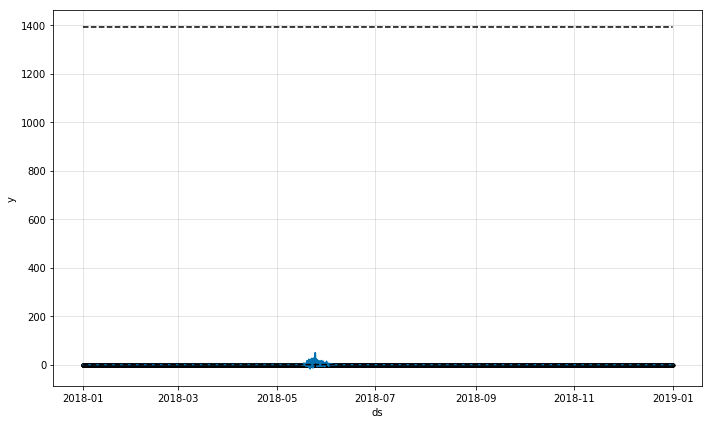

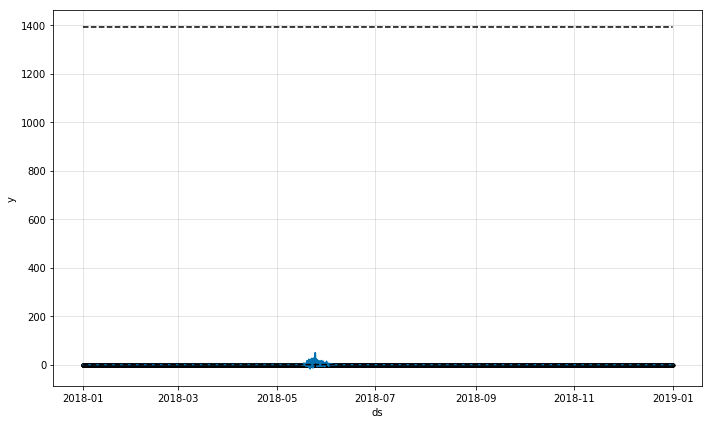

In [88]:
m.plot(forecast)

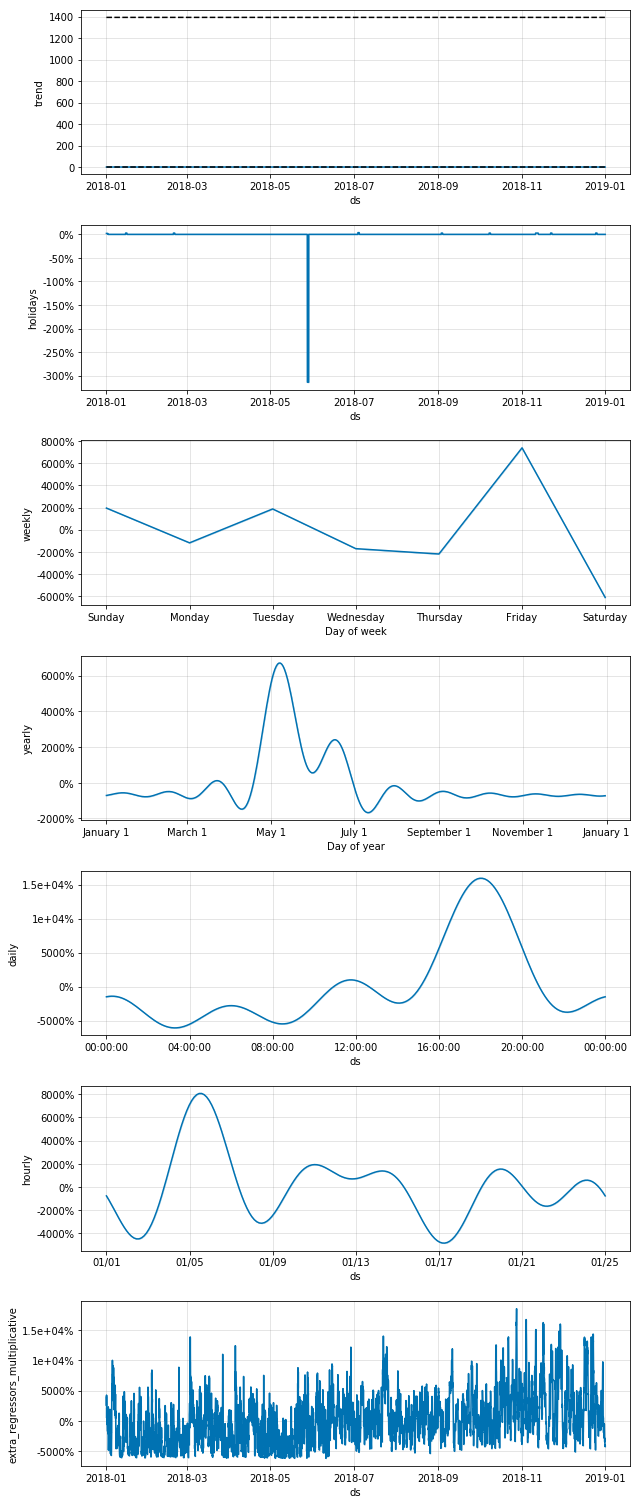

In [89]:
fig = m.plot_components(forecast)

In [90]:
def remove_negs(ts):
    ts['yhat'] = ts['yhat'].clip_lower(0)
    ts['yhat_lower'] = ts['yhat_lower'].clip_lower(0)
    ts['yhat_upper'] = ts['yhat_upper'].clip_lower(0)
    return ts

In [91]:
forecast['ds'] = forecast['ds'].apply(str)
specific_location['ds'] = specific_location['ds'].apply(str)

final = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],specific_location,on='ds',how='inner')


In [92]:
final = remove_negs(final)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning:

clip_lower(threshold) is deprecated, use clip(lower=threshold) instead

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning:

clip_lower(threshold) is deprecated, use clip(lower=threshold) instead

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning:

clip_lower(threshold) is deprecated, use clip(lower=threshold) instead



In [93]:
final['residual'] = final['y'] - final['yhat']

In [94]:
final['residual'] = final['y'] - final['yhat']

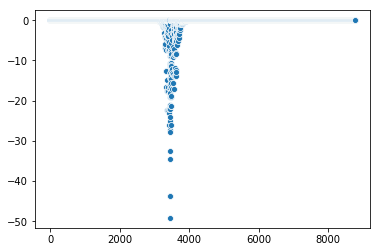

In [95]:
sns.scatterplot(data=final['residual']);

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



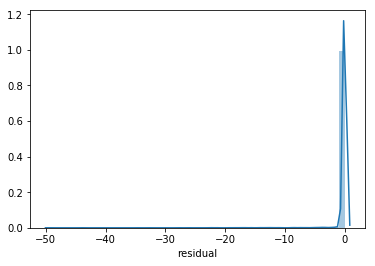

In [96]:
sns.distplot(final['residual'])

An uniform distribution suggests that the resuduals or errors are homoscedastic i.e they are pretty evenly distributed around the prediction line

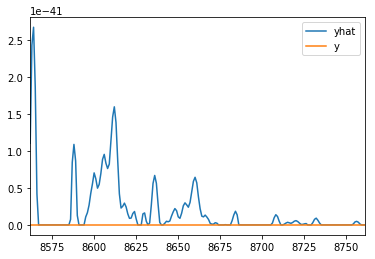

In [97]:
final[['yhat','y']].tail(200).plot()

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [99]:
mae_score = mean_absolute_error(final['y'].values,final['yhat'].values)
print(mae_score)

0.19147946073598146


In [100]:
mse_score = mean_squared_error(final['y'].values,final['yhat'].values)
print(mse_score)

3.255121327070163


In [101]:
rmse_score = np.sqrt(mse_score)
print(rmse_score)

1.8041954791735186


### Root Mean Square Error (RMSE) tells us that our model was able to forecast the average hourly pickup in the train set within 119 of the actual average number of pickup. Our average number of pick up range from around 0 to over 1392.

In [ ]:
specific_location.head()

In [ ]:
df_cv = cross_validation(m, initial='4320 hours', period='720 hours',horizon='720 hours')
df_cv.shape

In [ ]:
df_cv = remove_negs(df_cv)

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [ ]:
df_p

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',rolling_window=0.1)

In [ ]:
specific_location.sort_values(by='ds',inplace=True)

        t-1  t+1
833591  NaN  0.0
833592  0.0  0.0
833593  0.0  0.0
833594  0.0  0.0
833595  0.0  0.0
Test MSE: 0.000
Test RMSE: 0.000


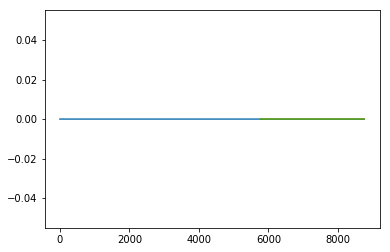

In [102]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# Create lagged dataset
values = DataFrame(specific_location.y)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
rmse = np.sqrt(test_score)
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % rmse)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()


In [ ]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
holidays

In [ ]:
ny = pd.DataFrame({'holiday': "New Year's Day", 'ds' : ['2018-01-01 00:00:00']})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : ['2018-01-18 00:00:00']}) 
wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : ['2018-02-15 00:00:00']})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : ['2018-05-30 00:00:00']})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : ['2018-07-04 00:00:00']})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : ['2018-09-07 00:00:00']})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : ['2018-10-12 00:00:00']})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : ['2018-11-11 00:00:00']})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : ['2018-11-26 00:00:00']})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : ['2018-12-25 00:00:00']})
inaug = pd.DataFrame({'holiday': 'Inauguration Day', 'ds' : ['2018-01-20 00:00:00']})

us_public_holidays = pd.concat([ny, mlk, wash, mem, ind, lab, col, vet, thanks, christ, inaug])

In [ ]:
us_public_holidays['ds'] = pd.to_datetime(us_public_holidays['ds'])

In [ ]:
us_public_holidays

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
train_holidays = cal.holidays(start=pjme_train.index.min(),
                              end=pjme_train.index.max())
test_holidays = cal.holidays(start=pjme_test.index.min(),
                             end=pjme_test.index.max())